In [6]:
from __future__ import print_function
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.metrics import average_precision_score
import seaborn as sns
%matplotlib inline

In [7]:
HOLDOUT = 0
data_dir = '../data/luna16/pred/64D/'
metrics_file = open("metrics_64slices.txt", "a+")

In [8]:
def plot_roc(HOLDOUT, true_labels, predicted_pr):
    
    fpr, tpr, _ = roc_curve(true_labels, predicted_pr)
    roc_auc = auc(fpr, tpr)

    sns.set()
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating curve - Holdout {}'.format(HOLDOUT))
    plt.legend(loc="lower right")

    plt.savefig('roc_64slices_{}.jpg'.format(HOLDOUT))
    plt.show()

In [9]:
def create_metrics(HOLDOUT):
    
    metrics_file.write('\n \n ****** Performance measure for Holdout= {} ******'.format(HOLDOUT))
    data_file = "predictions_truth_subset{}.csv".format(HOLDOUT)
    with open (data_dir + data_file, 'r') as f:
            data_df = pd.read_csv(f)

    predicted_pr = data_df.Prediction
    true_labels = data_df.Truth
    plot_roc(HOLDOUT, true_labels, predicted_pr)

    predicted_labels = np.round(predicted_pr)
    class1_predicted_cnt = np.count_nonzero(predicted_labels == 1)
    cf_mat = confusion_matrix(true_labels, predicted_labels)

    metrics_file.write('\n Total class_1 predicted = {}'.format(class1_predicted_cnt))
    metrics_file.write('\n Confusion Matrix = {}'.format(cf_mat))

    TN = cf_mat[0,0]  # np.sum (temp[true_labels != 1] != 1)  
    TP = cf_mat[1,1]  # np.sum (temp[true_labels == 1] == 1 )
    FN = cf_mat[1,0]  # np.sum (temp[true_labels == 1] != 1 )
    FP = cf_mat[0,1]  # np.sum (temp[true_labels != 1] == 1 )
    metrics_file.write ('\n \n TN = {} , TP = {}, FN = {}, FP = {}'.format(TN, TP, FN, FP))

    eval_dict = {}
    Sensitivity = TP/(TP+FN)
    TPR = Recall = Sensitivity 
    eval_dict['Sensitivity'] = Sensitivity 
    eval_dict['Recall'] = Recall 
    eval_dict['TPR'] = TPR
    Precision = TP/(TP+FP) 
    eval_dict['Precision'] = Precision 
    Specificity = TN/(TN+FP)
    TNR = Specificity 
    eval_dict['Specificity'] = Specificity 
    eval_dict['TNR'] = TNR
    eval_dict['FPR'] = 1 - TNR 
    eval_dict['TPR'] = 1 - TPR 
    eval_dict['FNR'] = FN /(FN + TP) 
    metrics_file.write ('\n \n Evaluation dictionary  = {} \n '.format(eval_dict))

    metrics_file.write("\n Recall = {}".format(recall_score(true_labels, np.round(predicted_pr))))
    metrics_file.write("\n Precision = {}".format(precision_score(true_labels, np.round(predicted_pr))))
    metrics_file.write("\n AUC = {}".format(roc_auc_score(true_labels, predicted_pr))) 
    metrics_file.write("\n Average Precision Score = {}".format(average_precision_score(true_labels, predicted_pr)))

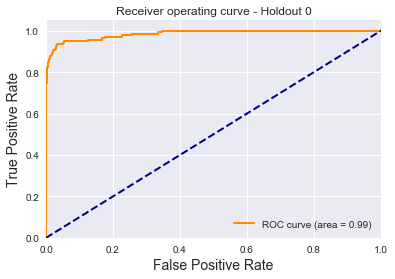

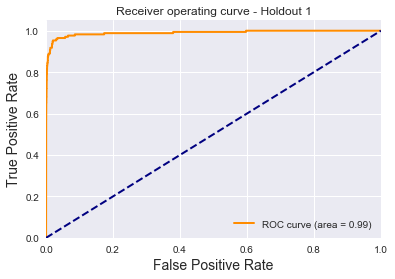

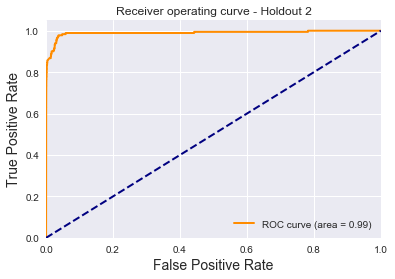

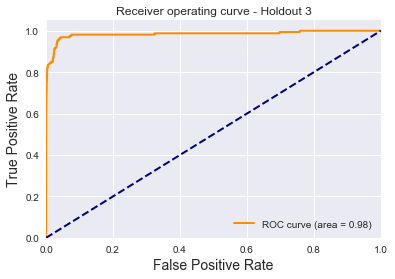

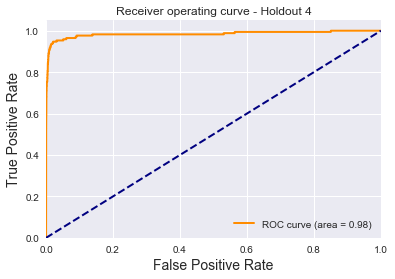

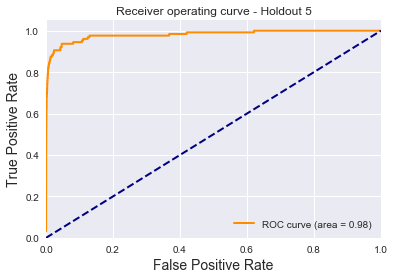

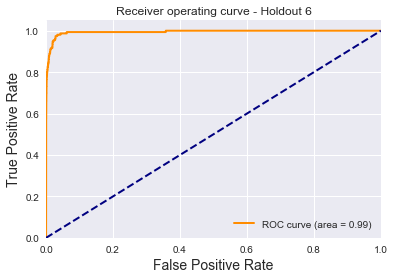

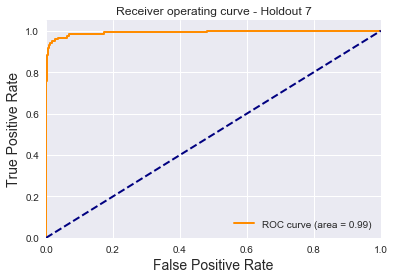

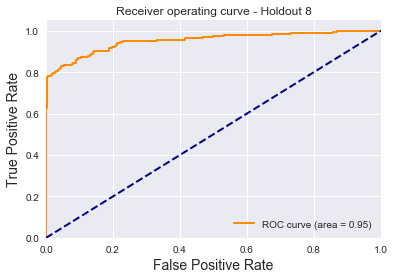

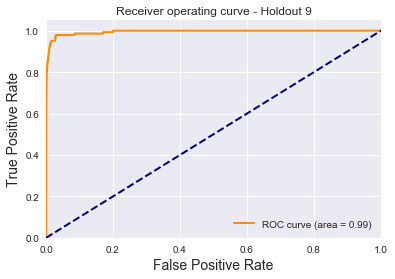

In [10]:
for ho in [0,1,2,3,4,5,6,7,8,9]:
    create_metrics(ho)
metrics_file.close();